get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month02.tif
maxmin value -1.595383882522583 3.2028722763061523
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month03.tif
maxmin value -1.615567684173584 3.7531979084014893
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month04.tif
maxmin value -1.2736952304840088 3.280010938644409
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month05.tif
maxmin value -1.4666496515274048 1.4795058965682983
maxmin value -1.4450780153274536 2.4622223377227783
maxmin value -1.70890474319458 2.171334981918335
maxmin value -1.0628228187561035 2.5273640155792236
maxmin value -1.714686393737793 1.3515139818191528
maxmin value -1.6259682178497314 3.2293355464935303
maxmin value -1.8528772592544556 2.0770585536956787
maxmin value -1.816481590270996 1.7967647314071655
maxmin value -1.642273306846

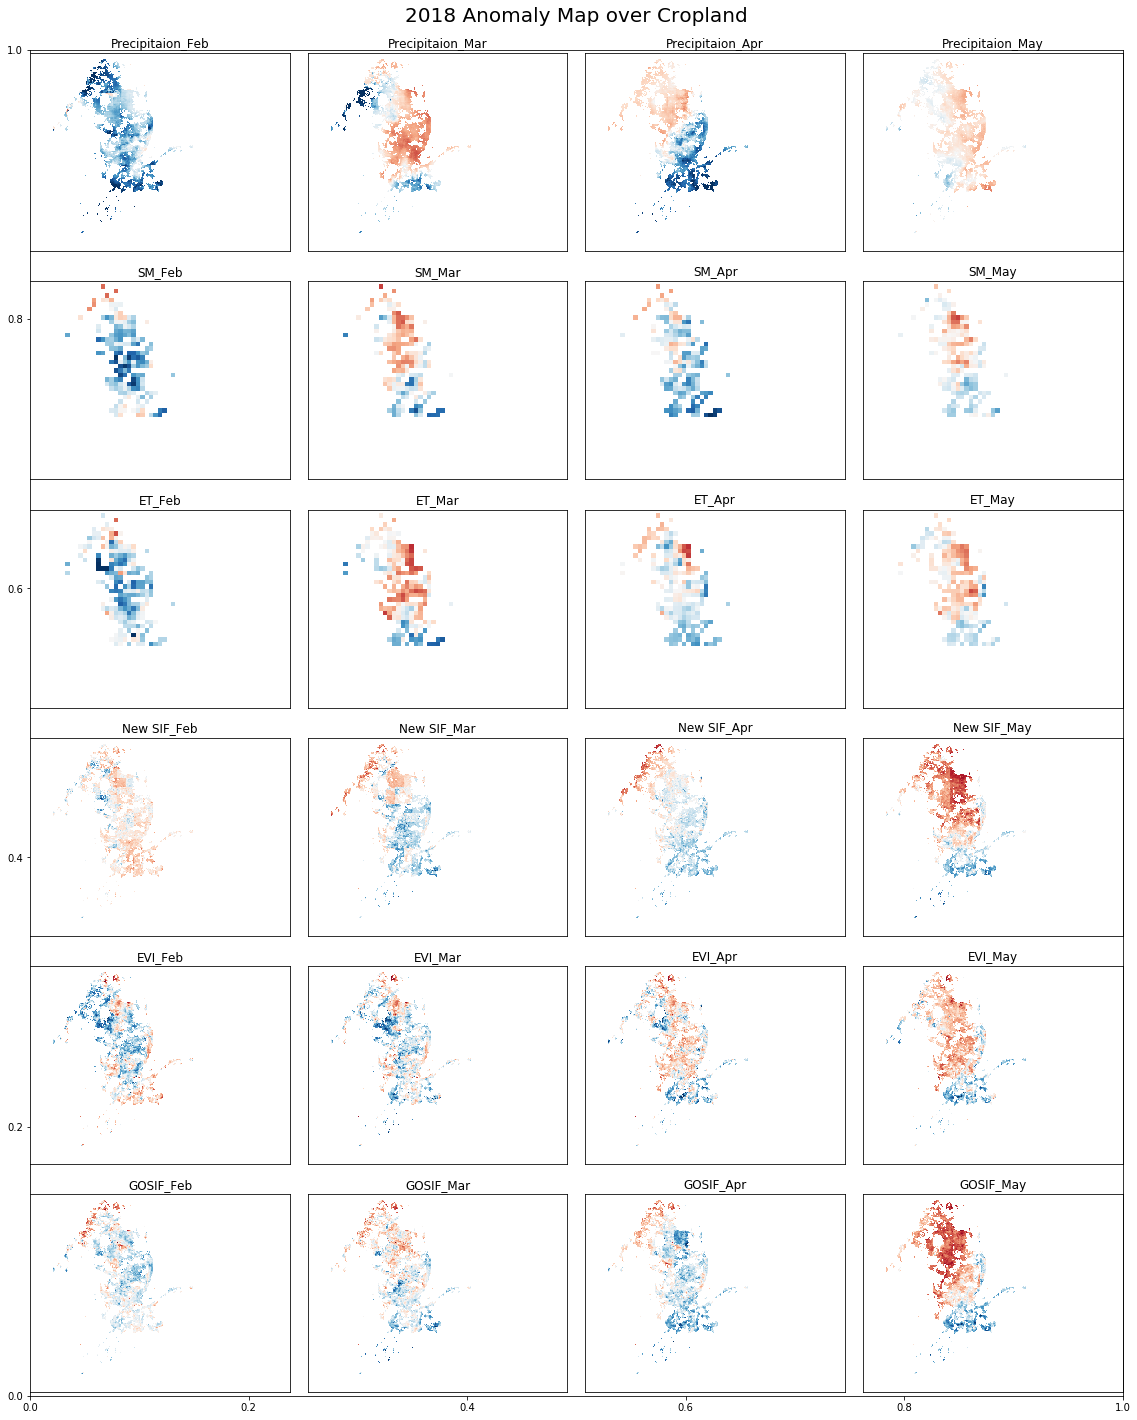

In [22]:
from epdatapro import *
from matplotlib import pyplot as plt
from matplotlib import cm
import glob
from osgeo import gdal
months =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

yy = "2018"
rp = r"D:\Cornell\EthiopianDrought\Chirps2"
rpp = r"D:\Cornell\EthiopianDrought\AData\Chirps2Pars"

smp = r"D:\Cornell\EthiopianDrought\AData\ESACCIV0.4.5"
smpp = r"D:\Cornell\EthiopianDrought\AData\ESACCIPars"

etp = r"D:\Cornell\EthiopianDrought\AData\ETClip"
etpp =  r"D:\Cornell\EthiopianDrought\AData\ETMonthPars"

ep = r"D:\Cornell\EthiopianDrought\MOD13C2.006Ethiopia"
epp = r"D:\Cornell\EthiopianDrought\AData\MOD13C2.006EthiopiaAnomalyPars"

sp = r"D:\Cornell\EthiopianDrought\AData\NewSIF0318AnomSplit"
spp = r"D:\Cornell\EthiopianDrought\AData\NewSIFMonthPars"

gsif =r'D:\Cornell\EthiopianDrought\AData\GOSIF0317AnomSplit'
gsifp =r'D:\Cornell\EthiopianDrought\AData\GOSIFMonthPars'

cropland005 =glob.glob(os.path.join(r'D:\Cornell\MCD12C1V006Clip', "MCD12C1.A{}001.*.tif".format(yy)))[0]
cropland025 = glob.glob(os.path.join(r'D:\Cornell\MCD12C1v006AggClip', "*MCD12C1.A{}001.*.tif".format(yy)))[0]

crop005 = gdal.Open(cropland005).ReadAsArray()
crop025 = gdal.Open(cropland025).ReadAsArray()


fig = plt.figure(figsize=(16,20))
plt.title("{} Anomaly Map over Cropland\n".format(yy), fontsize=20)

for m in range(2,6):
    ramn = chirpsAnomalyMap(rp,rpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1) 
    ax.set_title("Precipitaion_"+months[m-1])
    ramn[crop005 != 12] = -9999
    
    mask = np.where(ramn > -9999)
    ramn[ramn == -9999] = np.nan
    vmin = ramn[mask].min()
    vmax = ramn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(ramn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax) 
    ax.set_xticks([])
    ax.set_yticks([])

for m in range(2,6):
    smamn = esacciAnomalyMap(smp,smpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+4) 
    ax.set_title("SM_"+months[m-1])
    smamn[crop025 != 12] = -9999
    mask = np.where(smamn > -9999)
    smamn[smamn == -9999] = np.nan
    vmin = smamn[mask].min()
    vmax = smamn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(smamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(2,6):
    etamn = etAnomalyMap(etp,etpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+8) 
    ax.set_title("ET_"+months[m-1])
    etamn[crop025 != 12] = -9999
    mask = np.where(etamn > -9999) 
    etamn[etamn == -9999] = np.nan
    vmin = etamn[mask].min()
    vmax = etamn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(etamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(2,6):
    samn = NewSIFAnomalyMap(sp,spp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+12) 
    ax.set_title("New SIF_"+months[m-1])
    samn[crop005 != 12] = -9999
    mask = np.where(samn > -9999)
    samn[samn == -9999] = np.nan
    vmin = samn[mask].min()
    vmax = samn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(samn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(2,6):
    eamn = eviAnomalyMap(ep,epp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+16) 
    ax.set_title("EVI_"+months[m-1])
    eamn[crop005 != 12] = -9999
    mask = np.where(eamn > -9999) 
    eamn[eamn == -9999] = np.nan
    vmin = eamn[mask].min()
    vmax = eamn[mask].max()
#     print("maxmin value",vmin,vmax)
    cax = ax.imshow(eamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(2,6):
    eamn = GOSIFAnomalyMap(gsif,gsifp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+20) 
    ax.set_title("GOSIF_"+months[m-1])
    eamn[crop005 != 12] = -9999
    mask = np.where(eamn > -9999)
    eamn[eamn == -9999] = np.nan
    vmin = eamn[mask].min()
    vmax = eamn[mask].max()
#     print("maxmin value",vmin,vmax)
    cax = ax.imshow(eamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    
    

fig.tight_layout()#调整整体空白 
plt.show()

get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month06.tif
maxmin value -1.1239064931869507 3.2006208896636963
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month07.tif
maxmin value -2.362004041671753 1.3288758993148804
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month08.tif
maxmin value -1.4513810873031616 2.189986228942871
get the monthly parameters from file D:\Cornell\EthiopianDrought\AData\Chirps2Pars\chirps_month09.tif
maxmin value -2.341857671737671 2.3296077251434326
maxmin value 0.014625190757215023 3.086409568786621
maxmin value -1.0773979425430298 2.067790985107422
maxmin value -2.564997911453247 1.8880459070205688
maxmin value -2.485722780227661 1.7607522010803223
maxmin value -0.8973854184150696 2.889294147491455
maxmin value -0.7541450262069702 1.8816355466842651
maxmin value -0.642084002494812 2.0377840995788574
maxmin value -2.214449405670

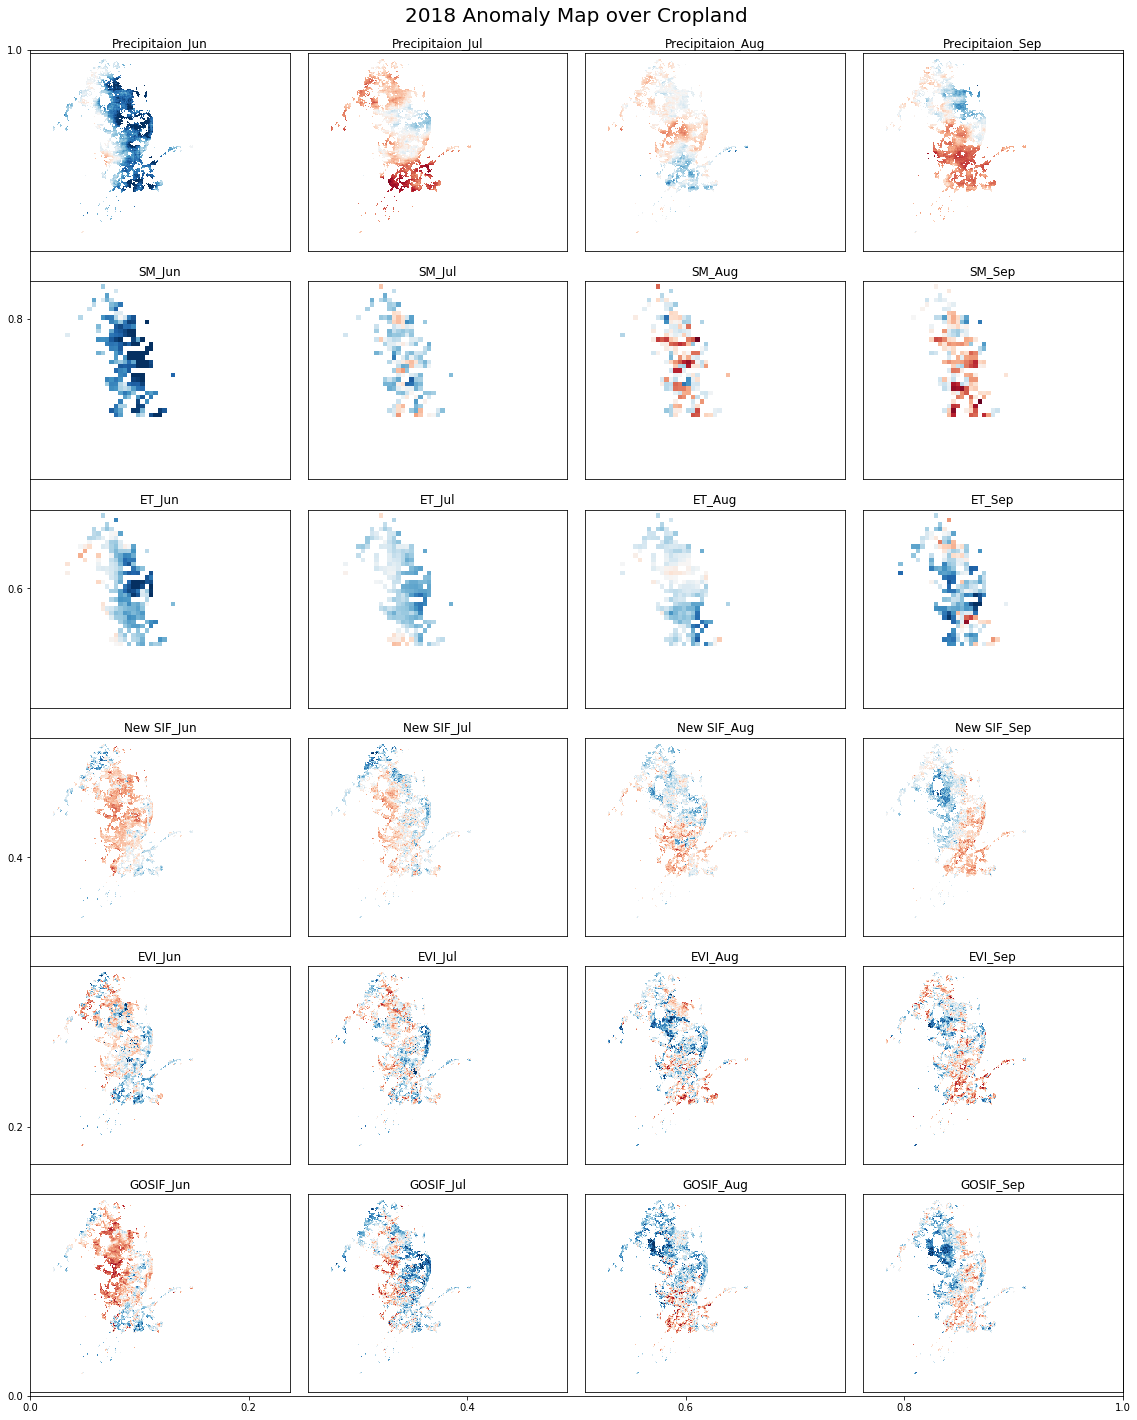

In [30]:
from epdatapro import *
from matplotlib import pyplot as plt
from matplotlib import cm
import glob
from osgeo import gdal
months =["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

yy = "2018"
rp = r"D:\Cornell\EthiopianDrought\Chirps2"
rpp = r"D:\Cornell\EthiopianDrought\AData\Chirps2Pars"

smp = r"D:\Cornell\EthiopianDrought\AData\ESACCIV0.4.5"
smpp = r"D:\Cornell\EthiopianDrought\AData\ESACCIPars"

etp = r"D:\Cornell\EthiopianDrought\AData\ETClip"
etpp =  r"D:\Cornell\EthiopianDrought\AData\ETMonthPars"

ep = r"D:\Cornell\EthiopianDrought\MOD13C2.006Ethiopia"
epp = r"D:\Cornell\EthiopianDrought\AData\MOD13C2.006EthiopiaAnomalyPars"

sp = r"D:\Cornell\EthiopianDrought\AData\NewSIF0318AnomSplit"
spp = r"D:\Cornell\EthiopianDrought\AData\NewSIFMonthPars"

gsif =r'D:\Cornell\EthiopianDrought\AData\GOSIF0317AnomSplit'
gsifp =r'D:\Cornell\EthiopianDrought\AData\GOSIFMonthPars'

cropland005 =glob.glob(os.path.join(r'D:\Cornell\MCD12C1V006Clip', "MCD12C1.A{}001.*.tif".format(yy)))[0]
cropland025 = glob.glob(os.path.join(r'D:\Cornell\MCD12C1v006AggClip', "*MCD12C1.A{}001.*.tif".format(yy)))[0]

crop005 = gdal.Open(cropland005).ReadAsArray()
crop025 = gdal.Open(cropland025).ReadAsArray()


fig = plt.figure(figsize=(16,20))
plt.title("{} Anomaly Map over Cropland\n".format(yy), fontsize=20)

for m in range(6,10):
    ramn = chirpsAnomalyMap(rp,rpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1-4) 
    ax.set_title("Precipitaion_"+months[m-1])
    ramn[crop005 != 12] = -9999
    mask = np.where(ramn > -9999)
    ramn[ramn == -9999] = np.nan
    vmin = ramn[mask].min()
    vmax = ramn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(ramn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax) 
    ax.set_xticks([])
    ax.set_yticks([])

for m in range(6,10):
    smamn = esacciAnomalyMap(smp,smpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+4-4) 
    ax.set_title("SM_"+months[m-1])
    smamn[crop025 != 12] = -9999
    mask = np.where(smamn > -9999)
    smamn[smamn == -9999] = np.nan
    vmin = smamn[mask].min()
    vmax = smamn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(smamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(6,10):
    etamn = etAnomalyMap(etp,etpp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+8-4) 
    ax.set_title("ET_"+months[m-1])
    etamn[crop025 != 12] = -9999
    mask = np.where(etamn > -9999) 
    etamn[etamn == -9999] = np.nan
    vmin = etamn[mask].min()
    vmax = etamn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(etamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(6,10):
    samn = NewSIFAnomalyMap(sp,spp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+12-4) 
    ax.set_title("New SIF_"+months[m-1])
    samn[crop005 != 12] = -9999
    mask = np.where(samn > -9999)
    samn[samn == -9999] = np.nan
    vmin = samn[mask].min()
    vmax = samn[mask].max()
    print("maxmin value",vmin,vmax)
    cax = ax.imshow(samn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(6,10):
    eamn = eviAnomalyMap(ep,epp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+16-4) 
    ax.set_title("EVI_"+months[m-1])
    eamn[crop005 != 12] = -9999
    mask = np.where(eamn > -9999) 
    eamn[eamn == -9999] = np.nan
    vmin = eamn[mask].min()
    vmax = eamn[mask].max()
#     print("maxmin value",vmin,vmax)
    cax = ax.imshow(eamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
for m in range(6,10):
    eamn = GOSIFAnomalyMap(gsif,gsifp,yy,str(m))
    ax = fig.add_subplot(6, 4, m-1+20-4) 
    ax.set_title("GOSIF_"+months[m-1])
    eamn[crop005 != 12] = -9999
    mask = np.where(eamn > -9999)
    eamn[eamn == -9999] = np.nan
    vmin = eamn[mask].min()
    vmax = eamn[mask].max()
#     print("maxmin value",vmin,vmax)
    cax = ax.imshow(eamn,cmap=plt.get_cmap("RdBu"),vmin=-2.5,vmax=2.5)
#     cbar = plt.colorbar(cax,ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    
    

fig.tight_layout()#调整整体空白 
plt.show()